In [2]:
#import necessary packages and data set
import pandas as pd
df=pd.read_excel('/content/Paris housing Data Set 2 4050.xlsx')

In [3]:
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Ensuring data types are correct

In [4]:
print(df.dtypes)

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object


In [5]:
#change data types
dfnew=df.dropna()
dfnew.loc[:, 'bedrooms'] = dfnew['bedrooms'].astype(int)
dfnew.loc[:, 'bathrooms'] = dfnew['bathrooms'].astype(int)
dfnew.loc[:, 'condition'] = dfnew['condition'].astype(int)

## First statistical test

In [6]:
df.describe() #basic statistical test on all variables

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.999500e+04,19984.000000,19988.000000,19998.000000,1.999400e+04,19999.000000,19998.000000,19999.000000,19998.000000,19999.000000,19993.000000
mean,5.353944e+05,3.366593,2.072969,2057.936294,1.560696e+04,1.444872,3.441794,7.605730,1967.953145,90.812041,1974.197819
std,3.659217e+05,0.930136,0.761162,905.640821,4.177576e+04,0.516672,0.665473,1.172624,28.317403,415.947901,675.199588
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,3.000000,7.000000,1950.000000,0.000000,1490.000000
50%,4.499000e+05,3.000000,2.000000,1900.000000,7.817500e+03,1.000000,3.000000,7.000000,1969.000000,0.000000,1830.000000
75%,6.400000e+05,4.000000,2.500000,2510.000000,1.100000e+04,2.000000,4.000000,8.000000,1991.000000,0.000000,2336.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


## Pre-processing

In [7]:
dfnew=df.dropna() #remove missing values
dfnew.round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0
5,1225000.0,4.0,4.0,5420.0,101930.0,1.0,3.0,11,2001.0,0,4760.0
...,...,...,...,...,...,...,...,...,...,...,...
19994,260000.0,3.0,2.0,1489.0,2800.0,2.0,3.0,7,2011.0,0,1584.0
19995,279000.0,5.0,2.0,2690.0,5557.0,2.0,3.0,7,2012.0,0,2090.0
19996,380000.0,3.0,2.0,1530.0,1305.0,2.0,3.0,7,2007.0,0,1320.0
19997,287000.0,3.0,2.0,1600.0,6315.0,2.0,3.0,8,2013.0,0,1608.0


In [8]:
dfnew = df[df['bedrooms'] != 33] #remove outliers

## Second statistical test

In [9]:
dfnew.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,19994.0,19983.0,19987.0,19997.0,19993.0,19998.0,19997.0,19998.0,19997.0,19998.0,19992.0
mean,535389.0,3.0,2.0,2058.0,15607.0,1.0,3.0,8.0,1968.0,91.0,1974.0
std,365930.0,1.0,1.0,906.0,41777.0,1.0,1.0,1.0,28.0,416.0,675.0
min,75000.0,1.0,0.0,290.0,520.0,1.0,1.0,1.0,1900.0,0.0,399.0
25%,317000.0,3.0,2.0,1420.0,5350.0,1.0,3.0,7.0,1950.0,0.0,1490.0
50%,449900.0,3.0,2.0,1900.0,7819.0,1.0,3.0,7.0,1969.0,0.0,1830.0
75%,640000.0,4.0,2.0,2510.0,11000.0,2.0,4.0,8.0,1991.0,0.0,2337.0
max,7700000.0,11.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,2015.0,2015.0,6210.0


## Investigation


Distribution of prices

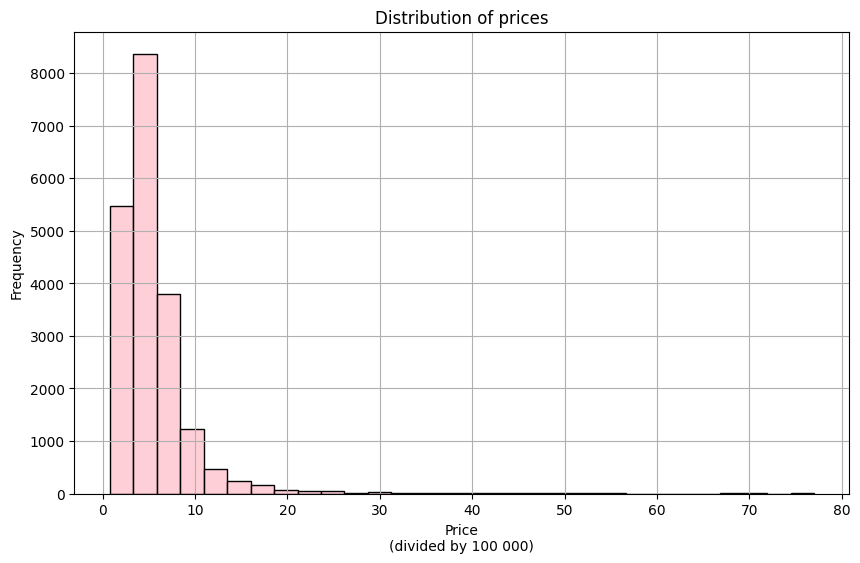

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfnew, x=dfnew['price']/100000, bins=30, color='pink')
plt.title('Distribution of prices')
plt.xlabel('Price\n(divided by 100 000)')

plt.ylabel('Frequency')
plt.grid(True)
plt.show()

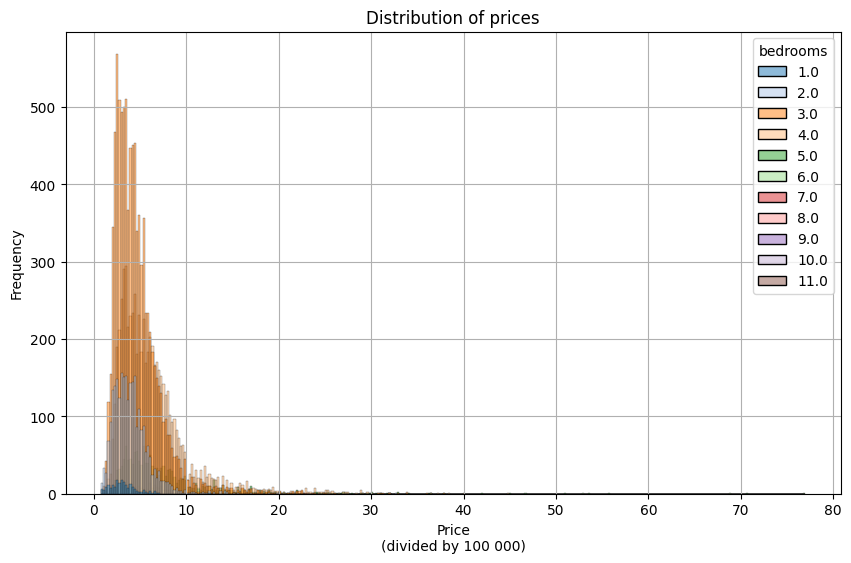

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfnew, x=dfnew['price']/100000, hue='bedrooms', palette='tab20')
plt.title('Distribution of prices')
plt.xlabel('Price\n(divided by 100 000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Correlation between price and number of bedrooms

In [12]:
dfnew[['price', 'bedrooms']].corr()

,price,bedrooms
price,1.000000,0.310243
bedrooms,0.310243,1.000000


Statistical test on 1 bedroom only

In [12]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 1]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,189.0,189.0,186.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0
mean,315748.0,1.0,1.0,885.0,17041.0,1.0,3.0,6.0,1941.0,179.0,1452.0
std,150745.0,0.0,0.0,395.0,47785.0,0.0,1.0,1.0,27.0,570.0,406.0
min,75000.0,1.0,0.0,370.0,779.0,1.0,1.0,3.0,1900.0,0.0,780.0
25%,215000.0,1.0,1.0,660.0,4120.0,1.0,3.0,5.0,1919.0,0.0,1170.0
50%,299000.0,1.0,1.0,780.0,6000.0,1.0,3.0,6.0,1939.0,0.0,1360.0
75%,390000.0,1.0,1.0,1020.0,10079.0,1.0,4.0,7.0,1950.0,0.0,1620.0
max,1247000.0,1.0,2.0,3000.0,533610.0,3.0,5.0,10.0,2015.0,2014.0,3150.0


Statistical test on 2 bedrooms only

In [13]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 2]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,2567.0,2567.0,2567.0,2566.0,2567.0,2567.0,2567.0,2567.0,2567.0,2567.0,2567.0
mean,399261.0,2.0,1.0,1238.0,12708.0,1.0,3.0,7.0,1952.0,87.0,1511.0
std,200626.0,0.0,1.0,472.0,49020.0,0.0,1.0,1.0,30.0,406.0,427.0
min,78000.0,2.0,0.0,440.0,600.0,1.0,1.0,4.0,1900.0,0.0,460.0
25%,265000.0,2.0,1.0,900.0,4000.0,1.0,3.0,6.0,1928.0,0.0,1230.0
50%,370000.0,2.0,1.0,1140.0,5570.0,1.0,3.0,7.0,1947.0,0.0,1440.0
75%,489000.0,2.0,2.0,1440.0,8122.0,1.0,4.0,7.0,1971.0,0.0,1700.0
max,3278000.0,2.0,4.0,6840.0,1164794.0,4.0,5.0,12.0,2015.0,2014.0,4270.0


Statistical test on 3 bedrooms only

In [14]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 3]
newfiltered_df.describe().round()


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,9162.0,9163.0,9162.0,9163.0,9159.0,9163.0,9162.0,9163.0,9163.0,9163.0,9159.0
mean,464760.0,3.0,2.0,1803.0,14978.0,1.0,3.0,7.0,1969.0,81.0,1837.0
std,264706.0,0.0,1.0,625.0,36065.0,1.0,1.0,1.0,26.0,394.0,543.0
min,82000.0,3.0,1.0,490.0,572.0,1.0,1.0,4.0,1900.0,0.0,399.0
25%,290000.0,3.0,2.0,1360.0,5400.0,1.0,3.0,7.0,1954.0,0.0,1450.0
50%,410000.0,3.0,2.0,1680.0,7879.0,1.0,3.0,7.0,1971.0,0.0,1720.0
75%,560000.0,3.0,2.0,2110.0,10650.0,2.0,4.0,8.0,1989.0,0.0,2130.0
max,3800000.0,3.0,4.0,6400.0,843309.0,4.0,5.0,13.0,2015.0,2015.0,4950.0


Statistical test on 4 bedrooms only

In [15]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 4]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,6304.0,6307.0,6307.0,6307.0,6306.0,6307.0,6307.0,6307.0,6306.0,6307.0,6306.0
mean,630102.0,4.0,2.0,2517.0,17063.0,2.0,3.0,8.0,1974.0,95.0,2266.0
std,387336.0,0.0,1.0,816.0,45459.0,0.0,1.0,1.0,28.0,425.0,712.0
min,100000.0,4.0,0.0,800.0,520.0,1.0,1.0,5.0,1900.0,0.0,700.0
25%,372000.0,4.0,2.0,1960.0,6038.0,1.0,3.0,7.0,1958.0,0.0,1742.0
50%,545000.0,4.0,2.0,2370.0,8314.0,2.0,3.0,8.0,1978.0,0.0,2160.0
75%,760000.0,4.0,3.0,2950.0,12098.0,2.0,4.0,9.0,1997.0,0.0,2670.0
max,4489000.0,4.0,6.0,7850.0,1651359.0,3.0,5.0,13.0,2015.0,2015.0,6210.0


Statistical test on 5 bedrooms only

In [16]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 5]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1435.0
mean,773574.0,5.0,3.0,2994.0,17514.0,2.0,4.0,8.0,1970.0,113.0,2399.0
std,594456.0,0.0,1.0,1070.0,44059.0,0.0,1.0,1.0,29.0,461.0,796.0
min,133000.0,5.0,1.0,1120.0,1989.0,1.0,2.0,5.0,1900.0,0.0,460.0
25%,429000.0,5.0,2.0,2250.0,6500.0,1.0,3.0,7.0,1957.0,0.0,1810.0
50%,605000.0,5.0,3.0,2810.0,9228.0,2.0,3.0,8.0,1969.0,0.0,2220.0
75%,900000.0,5.0,3.0,3490.0,13681.0,2.0,4.0,9.0,1996.0,0.0,2890.0
max,7062500.0,5.0,7.0,10040.0,1074218.0,3.0,5.0,13.0,2015.0,2015.0,6110.0


Statistical test on 6 bedrooms only

In [17]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 6]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0
mean,822078.0,6.0,3.0,3257.0,19033.0,2.0,3.0,8.0,1961.0,176.0,2256.0
std,807157.0,0.0,1.0,1287.0,38845.0,1.0,1.0,1.0,29.0,567.0,797.0
min,175000.0,6.0,1.0,1370.0,2370.0,1.0,1.0,5.0,1900.0,0.0,900.0
25%,435000.0,6.0,2.0,2498.0,6109.0,1.0,3.0,7.0,1946.0,0.0,1710.0
50%,650000.0,6.0,3.0,2940.0,8798.0,2.0,3.0,8.0,1965.0,0.0,2090.0
75%,890970.0,6.0,4.0,3602.0,14068.0,2.0,4.0,9.0,1979.0,0.0,2602.0
max,7700000.0,6.0,8.0,12050.0,248600.0,3.0,5.0,13.0,2014.0,2015.0,5790.0


Statistical test on 7 bedrooms only

In [18]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 7]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,951185.0,7.0,4.0,3974.0,20841.0,2.0,3.0,8.0,1963.0,211.0,2335.0
std,739954.0,0.0,1.0,2049.0,48884.0,1.0,1.0,2.0,30.0,622.0,824.0
min,280000.0,7.0,1.0,1940.0,2400.0,1.0,3.0,6.0,1901.0,0.0,1240.0
25%,539250.0,7.0,3.0,2808.0,7685.0,2.0,3.0,7.0,1954.0,0.0,1742.0
50%,728580.0,7.0,4.0,3335.0,8836.0,2.0,3.0,8.0,1964.0,0.0,2215.0
75%,946500.0,7.0,4.0,4565.0,15204.0,2.0,4.0,10.0,1982.0,0.0,2855.0
max,3200000.0,7.0,8.0,13540.0,307752.0,3.0,5.0,12.0,2013.0,2013.0,4850.0


Statistical test on 8 bedrooms only

In [19]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 8]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
mean,1105077.0,8.0,4.0,3800.0,8972.0,2.0,4.0,8.0,1956.0,0.0,2265.0
std,897496.0,0.0,1.0,1394.0,5297.0,1.0,1.0,1.0,31.0,0.0,1084.0
min,340000.0,8.0,2.0,2280.0,2580.0,1.0,3.0,7.0,1901.0,0.0,1380.0
25%,490000.0,8.0,3.0,2800.0,4800.0,1.0,3.0,7.0,1959.0,0.0,1560.0
50%,700000.0,8.0,3.0,3840.0,7500.0,2.0,3.0,8.0,1962.0,0.0,1780.0
75%,1650000.0,8.0,4.0,4300.0,11750.0,2.0,4.0,8.0,1977.0,0.0,2170.0
max,3300000.0,8.0,6.0,7710.0,20666.0,4.0,5.0,12.0,1997.0,0.0,4440.0


Statistical test on 9 bedrooms only

In [20]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 9]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,894000.0,9.0,4.0,3775.0,5480.0,2.0,3.0,8.0,1932.0,335.0,2091.0
std,381534.0,0.0,2.0,588.0,1070.0,0.0,0.0,2.0,33.0,821.0,552.0
min,450000.0,9.0,3.0,2820.0,4400.0,2.0,3.0,7.0,1908.0,0.0,1448.0
25%,624999.0,9.0,3.0,3658.0,4610.0,2.0,3.0,7.0,1915.0,0.0,1585.0
50%,817000.0,9.0,4.0,3755.0,5254.0,2.0,3.0,7.0,1916.0,0.0,2210.0
75%,1193500.0,9.0,4.0,3995.0,6255.0,2.0,3.0,8.0,1933.0,0.0,2498.0
max,1400000.0,9.0,8.0,4620.0,6988.0,2.0,3.0,11.0,1996.0,2010.0,2710.0


Statistical test on 10 bedrooms only

In [21]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 10]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,819333.0,10.0,3.0,3707.0,8860.0,2.0,4.0,8.0,1960.0,0.0,2193.0
std,284678.0,0.0,2.0,839.0,4457.0,1.0,1.0,1.0,48.0,0.0,479.0
min,650000.0,10.0,2.0,2920.0,3745.0,1.0,3.0,7.0,1913.0,0.0,1810.0
25%,655000.0,10.0,2.0,3265.0,7332.0,2.0,4.0,7.0,1936.0,0.0,1925.0
50%,660000.0,10.0,3.0,3610.0,10920.0,2.0,4.0,7.0,1958.0,0.0,2040.0
75%,904000.0,10.0,4.0,4100.0,11417.0,2.0,4.0,8.0,1983.0,0.0,2385.0
max,1148000.0,10.0,5.0,4590.0,11914.0,2.0,4.0,9.0,2008.0,0.0,2730.0


Statistical test on 11 bedrooms only

In [22]:
newfiltered_df = dfnew[dfnew['bedrooms'] == 11]
newfiltered_df.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0
25%,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0
50%,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0
75%,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0
max,520000.0,11.0,3.0,3000.0,4960.0,2.0,3.0,7.0,1918.0,1999.0,1420.0


Number of bedrooms vs the average price in each categories(1bed,2bed...etc)

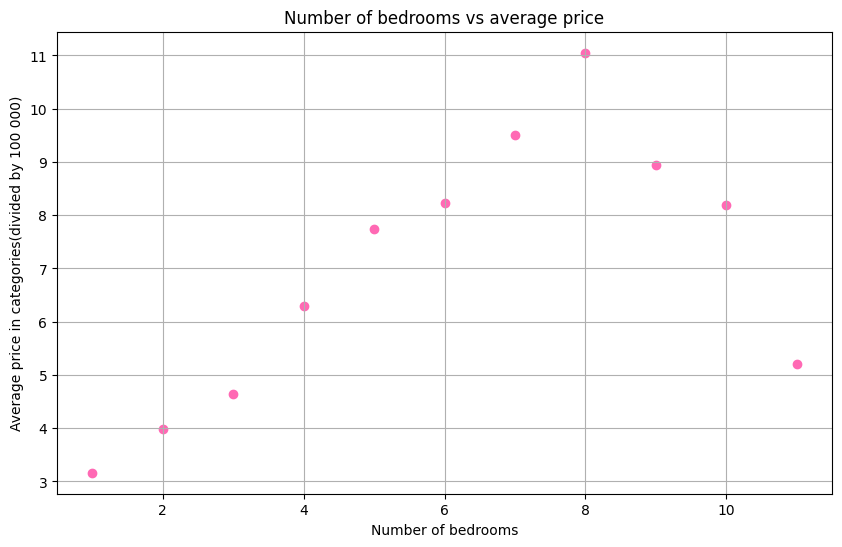

In [13]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11])
y = np.array([3.16330, 3.99149, 4.64792,6.29997,7.73915,8.22078,9.51185,11.05077,8.94000,8.19333,5.20000]) #means from previous tests
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = 'hotpink')
plt.xlabel('Number of bedrooms')
plt.ylabel('Average price in categories(divided by 100 000)')
plt.title('Number of bedrooms vs average price')
plt.grid(True)
plt.show()

Number of floors and total squarefoot

In [14]:
dfnew[['floors', 'sqft_total']].corr()

,floors,sqft_total
floors,1.000000,0.015869
sqft_total,0.015869,1.000000


Grade vs price

In [15]:
dfnew[['price', 'grade']].corr()

,price,grade
price,1.000000,0.665272
grade,0.665272,1.000000


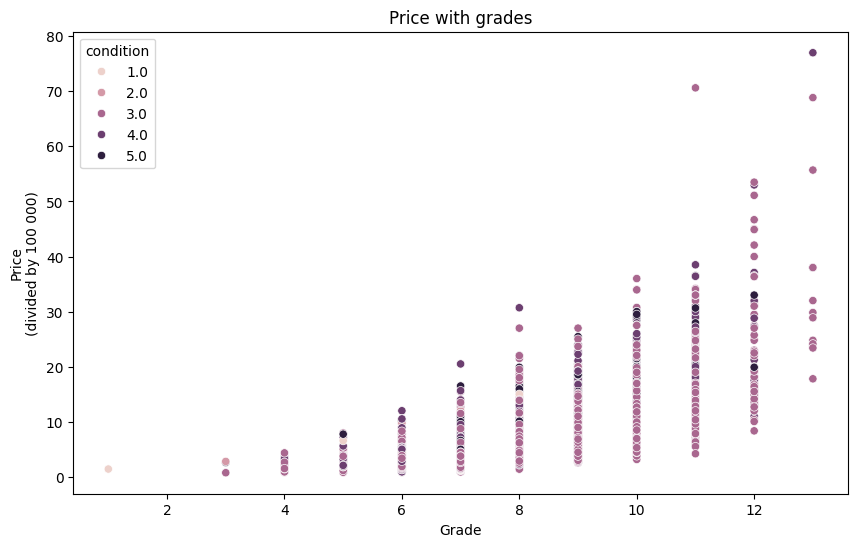

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dfnew, y=dfnew['price']/100000, x='grade', hue='condition')
plt.title('Price with grades')
plt.ylabel('Price\n(divided by 100 000)')
plt.xlabel('Grade')
plt.show()

Condition vs price

In [17]:
dfnew[['price', 'condition']].corr()

,price,condition
price,1.000000,0.047243
condition,0.047243,1.000000


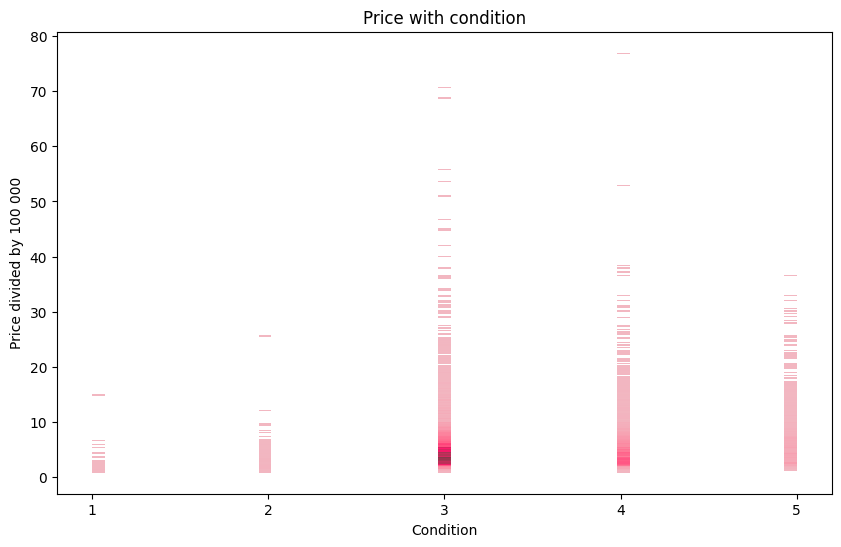

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfnew, y=dfnew['price']/100000, x='condition', color='pink')
plt.title('Price with condition')
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'])
plt.ylabel('Price divided by 100 000')
plt.xlabel('Condition')
plt.show()

Price vs year built

In [18]:
dfnew[['price', 'built']].corr()

,price,built
price,1.000000,0.040099
built,0.040099,1.000000


In [19]:
df['Renovated'] = np.where(df['renovated'] > 0, 'yes', 'no') #change renovated column to 'yes' or 'no'

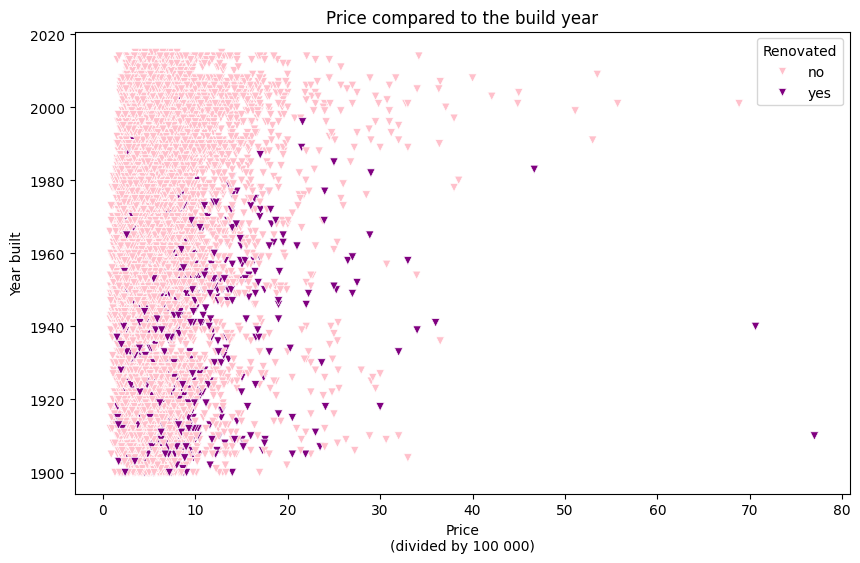

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=dfnew['price']/100000, y='built', hue='Renovated', marker='v', palette=['pink', 'purple'])
plt.xlabel('Price\n(divided by 100 000)')
plt.ylabel('Year built')
plt.title('Price compared to the build year')
plt.show()

Price vs size of usable space

In [21]:
dfnew[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.701259
sqft_living,0.701259,1.000000


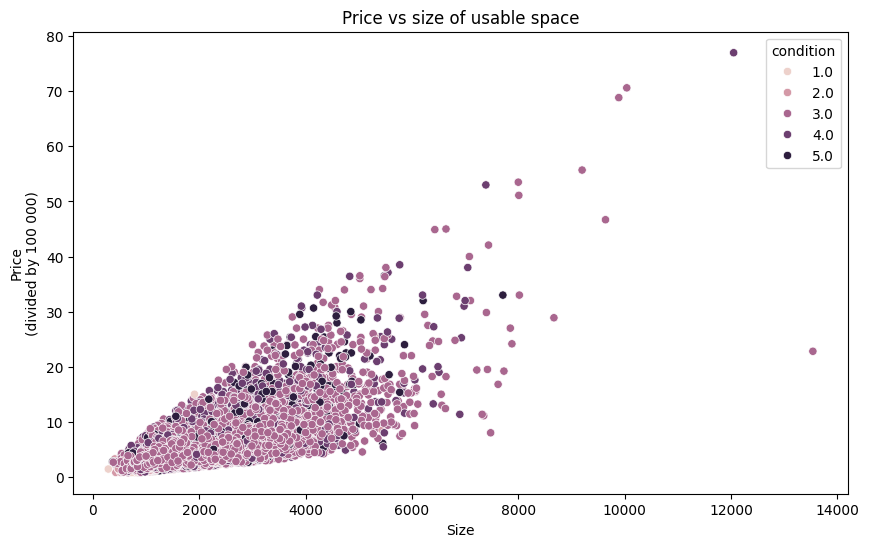

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=dfnew, y=dfnew['price']/100000, x='sqft_living', hue='condition')
plt.title('Price vs size of usable space')
plt.ylabel('Price\n(divided by 100 000)')
plt.xlabel('Size')
plt.show()

Correlation between price and total sqft

In [23]:
dfnew[['price', 'sqft_total']].corr()

,price,sqft_total
price,1.000000,0.085874
sqft_total,0.085874,1.000000


Correlation between price and living area sqft

In [24]:
dfnew[['price', 'living_area_sqft']].corr() #definition of living_area_sqft?

,price,living_area_sqft
price,1.000000,0.595707
living_area_sqft,0.595707,1.000000
